In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/Users/benediktas/dev/University/data-science/tennis/tennis_atp/tennis_atpatp_matches_combined.csv")
# df.head(3)
df.shape


(126167, 49)

In [15]:
# Filters data: remove matches with unknown handedness and missing ace data
handedness_df = df[
    (df['winner_hand'].isin(['R', 'L'])) & 
    (df['loser_hand'].isin(['R', 'L'])) &
    (df['w_ace'].notna()) & 
    (df['l_ace'].notna()) &
    (df['w_svpt'].notna()) & 
    (df['l_svpt'].notna()) &
    (df['w_svpt'] > 0) & 
    (df['l_svpt'] > 0)
].copy()


In [ ]:
# Calculates ace rates for winners and losers
handedness_df['winner_ace_rate'] = handedness_df['w_ace'] / handedness_df['w_svpt']
handedness_df['loser_ace_rate'] = handedness_df['l_ace'] / handedness_df['l_svpt']

# Create separate rows for each player's performance
winners = handedness_df[['winner_hand', 'winner_ace_rate', 'w_ace', 'w_svpt']].copy()
winners.columns = ['hand', 'ace_rate', 'aces', 'serve_points']

losers = handedness_df[['loser_hand', 'loser_ace_rate', 'l_ace', 'l_svpt']].copy()
losers.columns = ['hand', 'ace_rate', 'aces', 'serve_points']

all_players = pd.concat([winners, losers], ignore_index=True)  # Combining all player performances

print(f"Total player-match observations: {len(all_players)}")
all_players.head()


Total player-match observations: 195670


,hand,ace_rate,aces,serve_points
0,R,0.050847,3.0,59.0
1,R,0.085714,6.0,70.0
2,R,0.041667,2.0,48.0
3,R,0.035714,3.0,84.0
4,R,0.055118,7.0,127.0


In [ ]:
# Compares ace rates by handedness
left_handed = all_players[all_players['hand'] == 'L']
right_handed = all_players[all_players['hand'] == 'R']

print("Ace Rate Comparison:")
print(f"\nLeft-handed players:")
print(f"  Mean ace rate: {left_handed['ace_rate'].mean():.4f} ({left_handed['ace_rate'].mean()*100:.2f}%)")
print(f"  Median ace rate: {left_handed['ace_rate'].median():.4f}")
print(f"  Total observations: {len(left_handed):,}")

print(f"\nRight-handed players:")
print(f"  Mean ace rate: {right_handed['ace_rate'].mean():.4f} ({right_handed['ace_rate'].mean()*100:.2f}%)")
print(f"  Median ace rate: {right_handed['ace_rate'].median():.4f}")
print(f"  Total observations: {len(right_handed):,}")

print(f"\nDifference: {(left_handed['ace_rate'].mean() - right_handed['ace_rate'].mean())*100:.2f} percentage points")


Ace Rate Comparison:

Left-handed players:
  Mean ace rate: 0.0706 (7.06%)
  Median ace rate: 0.0563
  Total observations: 28,287

Right-handed players:
  Mean ace rate: 0.0728 (7.28%)
  Median ace rate: 0.0595
  Total observations: 167,383

Difference: -0.22 percentage points


/var/folders/3w/c8w7npq11dl6zgnjd6gy995c0000gn/T/ipykernel_18733/1227537866.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([right_handed['ace_rate'], left_handed['ace_rate']],


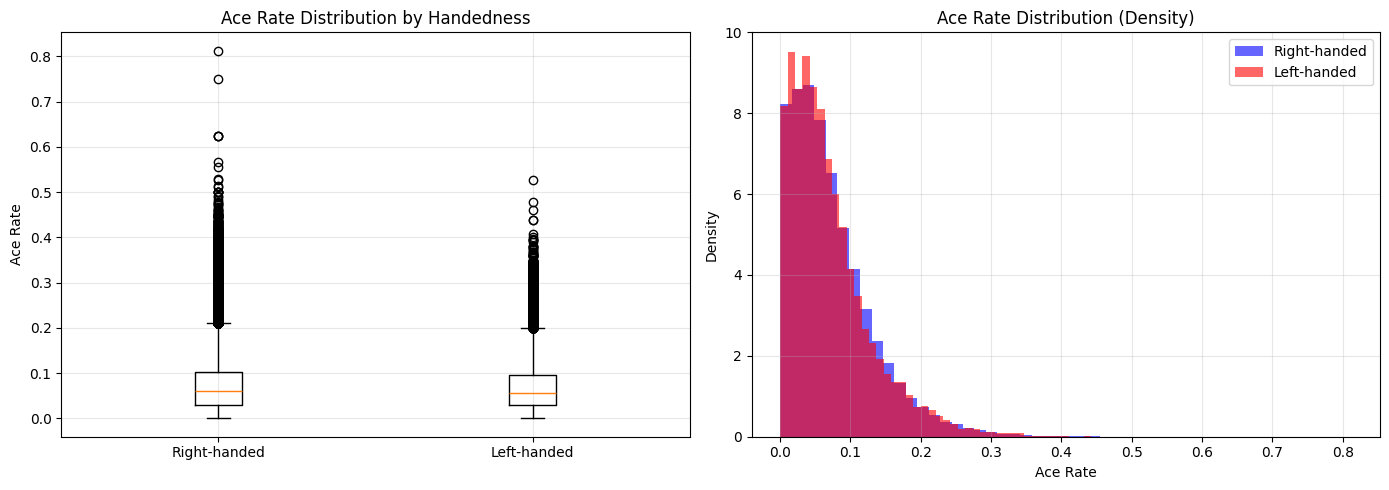

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot([right_handed['ace_rate'], left_handed['ace_rate']], 
                labels=['Right-handed', 'Left-handed'])
axes[0].set_ylabel('Ace Rate')
axes[0].set_title('Ace Rate Distribution by Handedness')
axes[0].grid(True, alpha=0.3)

# Histogram comparison
axes[1].hist(right_handed['ace_rate'], bins=50, alpha=0.6, label='Right-handed', color='blue', density=True)
axes[1].hist(left_handed['ace_rate'], bins=50, alpha=0.6, label='Left-handed', color='red', density=True)
axes[1].set_xlabel('Ace Rate')
axes[1].set_ylabel('Density')
axes[1].set_title('Ace Rate Distribution (Density)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
